## Part 2(d): Visualize the horizontal and vertical image gradients given

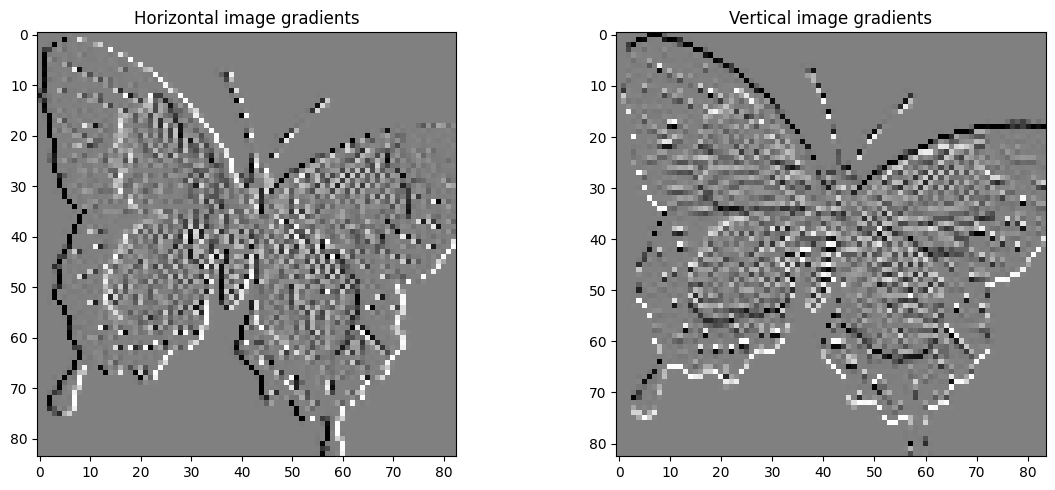

In [5]:
# Do not modify the lines below

import numpy as np
import matplotlib.pyplot as plt

# Load the horizontal and vertical image gradients
x_gradients = np.load('x_gradients.npy')
y_gradients = np.load('y_gradients.npy')
# x_gradients is of shape (84, 83)
# y_gradients is of shape (83, 84)

# Check if data is of the correct type and shape
assert(isinstance(x_gradients, np.ndarray))
assert(isinstance(y_gradients, np.ndarray))
assert(x_gradients.shape == (84,83))
assert(y_gradients.shape == (83,84))
assert(x_gradients.dtype == np.float64)
assert(y_gradients.dtype == np.float64)

# Visualizing the image gradients

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_gradients, cmap='gray')
plt.title("Horizontal image gradients")

plt.subplot(1, 2, 2)
plt.imshow(y_gradients, cmap='gray')
plt.title("Vertical image gradients")

plt.tight_layout()
plt.show()

# Part 2(d): Construct the input data and desired outputs for OLS formulation

In [6]:
# Construct the input data matrix A and the desired outputs y for the OLS
# formulation
#
# Required: Write code below that produces two variables, A and y.
#
# A should be a matrix of type numpy.float64 that contains the input data
# matrix
# y should be a vector of type numpy.float64 that contains the desired outputs
#
# Include a screenshot of this part in your PDF submission
#
#################################################################################
#                               YOUR CODE BELOW                                 #
#################################################################################

n = 84  # Size of the image

# Initializing matrix A
A = np.zeros((2 * n * (n - 1), n * n))

# Filling horizontal gradients coefficients
for i in range(n):
    for j in range(n - 1):
        A[i * (n - 1) + j, i * n + j] = -1
        A[i * (n - 1) + j, i * n + j + 1] = 1

# Filling vertical gradients coefficients
for j in range(n):
    for i in range(n - 1):
        A[n * (n - 1) + j * (n - 1) + i, i * n + j] = -1
        A[n * (n - 1) + j * (n - 1) + i, (i + 1) * n + j] = 1

# Vector y for the real horizontal and vertical gradients
# We flatten the gradient matrices and concatenate them to form Vector y
y = np.concatenate((x_gradients.ravel(), y_gradients.ravel()))

#################################################################################
#                                YOUR CODE ABOVE                                #
#################################################################################

# Do not modify the lines below
# Check if A and y are of the correct type and have sensible shapes

assert(isinstance(A, np.ndarray))
assert(isinstance(y, np.ndarray))
assert(len(A.shape) == 2)
assert(len(y.shape) == 1)
assert(A.shape[0] == y.shape[0])
assert(A.dtype == np.float64)
assert(y.dtype == np.float64)

print("Sample of Input Data: {}\n{}\n\nSample of Desired Outputs: {}\n{}".format(A.shape, A[::1000,::1000], y.shape, y[::100]))

Sample of Input Data: (13944, 7056)
[[-1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]

Sample of Desired Outputs: (13944,)
[ 0.          0.          0.          0.          0.          0.01960784
  0.         -0.2235294   0.          0.          0.02352941  0.19607843
 -0.00392157  0.65098035  0.         -0.09019608  0.05882353  0.
  0.          0.01960784  0.01176471  0.12549019 -0.95294118  0.18431371
  0.01568628 -0.03921569  0.02745098 -0.67843139  0.14509803 -0.00784314
 -0.04313726 -0.47843137  0.56470591 -0.21568629 -0.01960784 -0.03529412
  0.40

# Part 2(d): Solve the OLS problem and rearrange the solution into the reconstructed image

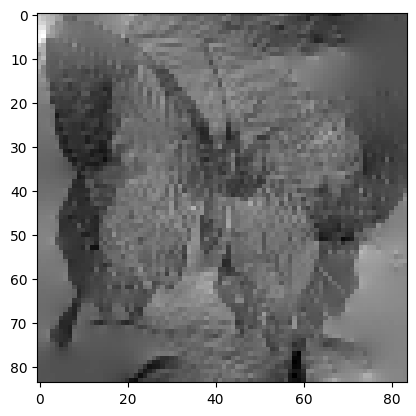

In [8]:
# Solve the OLS problem given the input data matrix A and the desired outputs y.
# Then rearrange the solution w into the reconstructed image
#
# Required: Write code below to find the solution w to the OLS problem and
# rearrange w into the reconstructed image
#
# w should be a vector of type numpy.float64 that contains the solution to the
# OLS problem
# w_as_img should be a matrix of type numpy.float64 that contains the
# reconstructed image
#
# Include a screenshot of this part in your PDF submission
#
#################################################################################
#                               YOUR CODE BELOW                                 #
#################################################################################

# Solving the OLS problem using SVD
U, s, Vh = np.linalg.svd(A, full_matrices=False)
w = Vh.T @ np.linalg.inv(np.diag(s)) @ U.T @ y

# Reshaping our solution to the size of image
w_as_img = w.reshape((n, n)) 

#################################################################################
#                                YOUR CODE ABOVE                                #
#################################################################################

# Do not modify the lines below
# Check if w is of the correct type and has a sensible shape
assert(isinstance(w_as_img, np.ndarray))
assert(len(w.shape) == 1)
assert(w.shape[0] == A.shape[1])
assert(w.dtype == np.float64)

# Check if w_as_img is of the correct type and has a sensible shape
assert(isinstance(w_as_img, np.ndarray))
assert(len(w_as_img.shape) == 2)
assert(np.prod(w_as_img.shape) == w.shape[0])
assert(w_as_img.shape[0] == x_gradients.shape[0])
assert(w_as_img.shape[1] == x_gradients.shape[1]+1)
assert(w_as_img.shape[0] == y_gradients.shape[0]+1)
assert(w_as_img.shape[1] == y_gradients.shape[1])
assert(w_as_img.dtype == np.float64)

# Show the reconstructed image
plt.imshow(w_as_img, cmap='gray')